In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
#laoding the data
data=pd.read_csv('/content/ortho_knnnb.csv')
display(data)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [81]:
#The data here has 6independent variables and 1 dependent variable. All these variables turn to determine weather or not a patient at this facility surfers from paget's disease or not 

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [83]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [84]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

No null values in the data


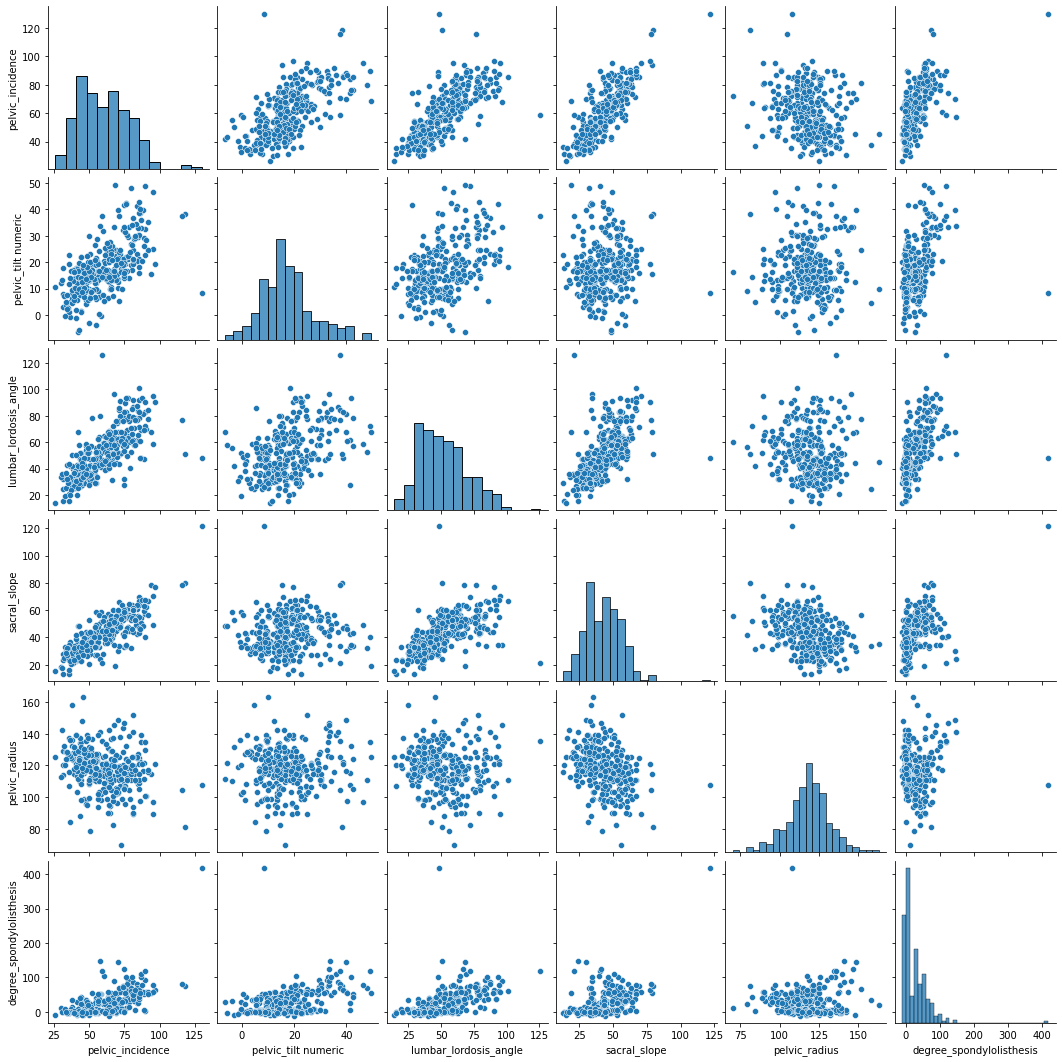

In [85]:
#pairplotting the features to see their relationship
sns.pairplot(data)

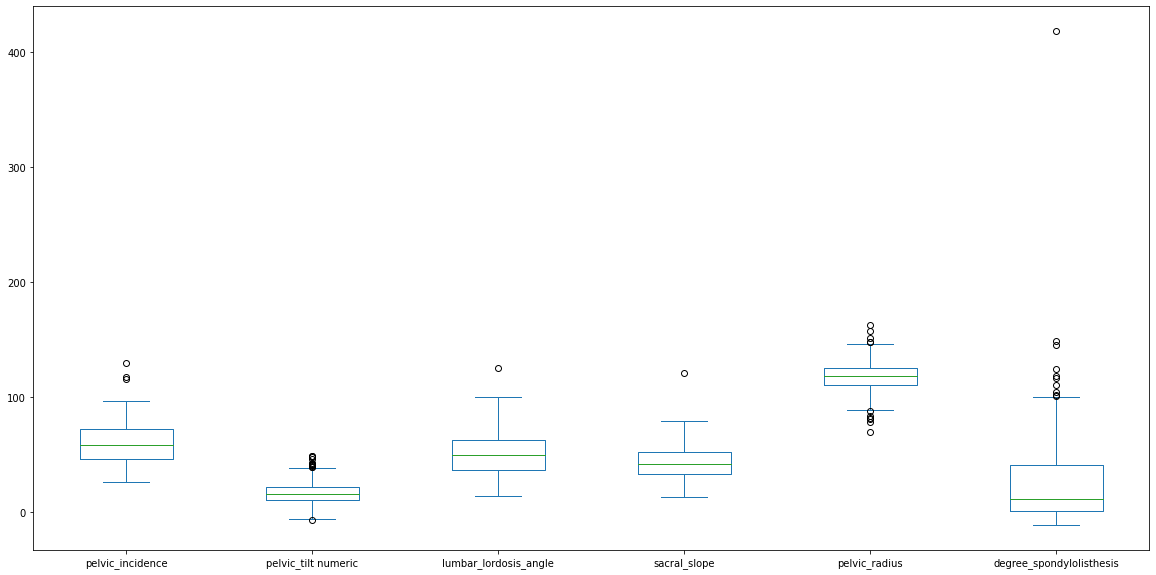

In [86]:
data.plot(kind='box', figsize=(20,10))

this bar plot shows some outliers on different columns.


In [87]:
#create a new column called symptom_class and assignining values 1 and 0 based off of the column class
condition=[(data['class']=='Abnormal'),
(data['class']=='normal')]
values=['1','0']


In [88]:
data['symptom_class']=np.select(condition,values)


In [89]:
#now that a new columnhas been created, lets drop class column
df=data.drop('class',axis=1)
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   symptom_class             310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [91]:
df.symptom_class=df.symptom_class.astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   symptom_class             310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [93]:
#lets see the correlation that exist between these variables
corr=df.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.443687
symptom_class,0.353336,0.326063,0.312484,0.210602,-0.309857,0.443687,1.000000


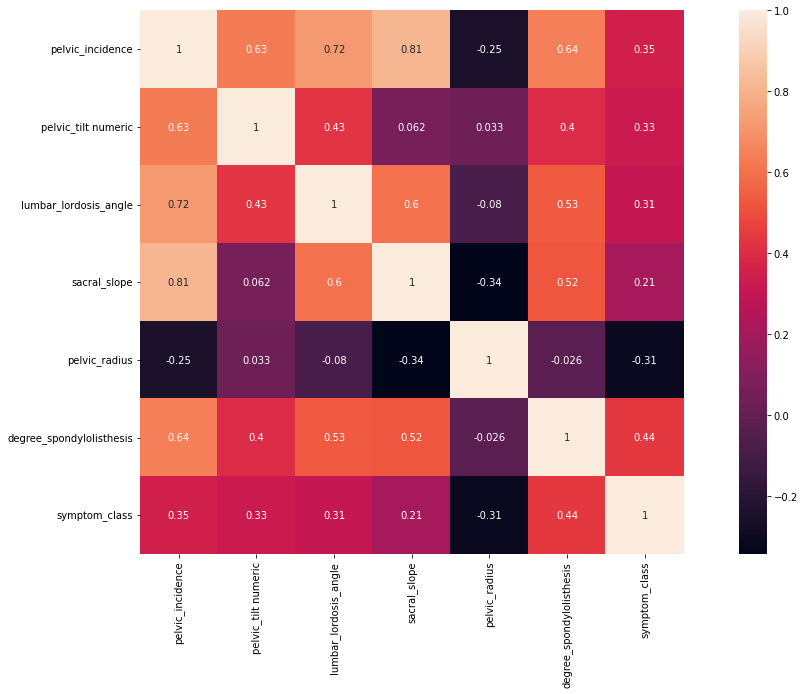

In [94]:
#what does the heat map says
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,square=True)

In [95]:
x=df.iloc[:,:-1]
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [96]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: symptom_class, Length: 310, dtype: int64

In [97]:
df['symptom_class'].value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

The overall data display a weak correlation between the variables which probably indicates a simultanous influence of all independent variables on the dependent variable

In [98]:
#lets import necessarir libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix


In [99]:
#lets split the data into test and train at 20:80
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [100]:
#training and fitting the model with k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [101]:
KNN_prediction=KNN_model.predict(x_test)
KNN_prediction2=KNN_model.predict(x_train)
print(KNN_prediction)
print(KNN_prediction2)

[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1]
[1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0]


In [102]:
#lets find the accuracy level of the test set
test_score_knn=accuracy_score(KNN_prediction,y_test)
print(test_score_knn)

0.8225806451612904


In [103]:
#accuracy score for train set
train_score2=accuracy_score(KNN_prediction2,y_train)
print(train_score2)

0.9395161290322581


The accuracy score on the training set is better than the accuracy score on the test set

In [104]:
train_accuracy=[]
test_accuracy=[]

In [105]:
# #lets find out the value of k for which the model will reach its optimum
train_accuracy=[]
test_accuracy=[]
for k in range(1,10):
   KNN_model=KNeighborsClassifier(n_neighbors=k)
   KNN_model.fit(x_train,y_train)
   train_prediction=KNN_model.predict(x_train)
   train_score=accuracy_score(train_prediction,y_train)
   train_accuracy.append(train_score)
   test_prediction=KNN_model.predict(x_test)
   test_score_knn=accuracy_score(test_prediction,y_test)
   test_accuracy.append((test_score_knn))


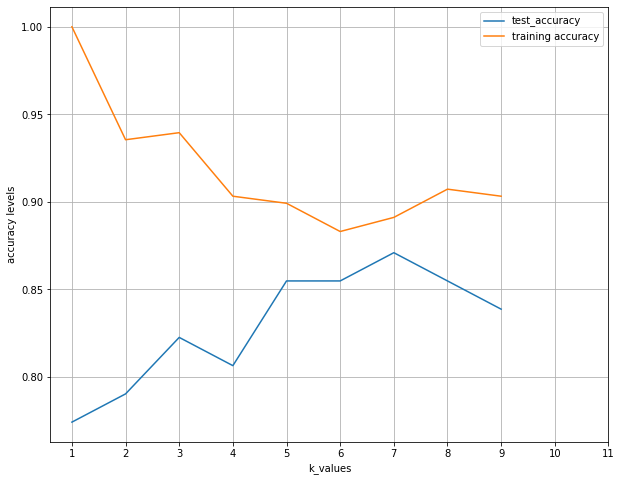

In [106]:
# #lets plot the different accuracy LeveneResult
plt.figure(figsize=(10,8))
plt.plot(range(1,10),test_accuracy,label='test_accuracy')
plt.plot(range(1,10),train_accuracy, label='training accuracy')
plt.legend()
plt.xticks(range(1,12))
plt.xlabel('k_values')
plt.ylabel('accuracy levels')
plt.grid()
plt.show()

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  train_pred=knn.predict(x_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred=knn.predict(x_test)
  test_accuracy.append((accuracy_score(test_pred,y_test)))
  print('Test Accuracy',test_score,'of value',k)
  #plt.plot(test_accuracy, label='Testing Accuracy')

Test Accuracy 0.8387096774193549 of value 1
Test Accuracy 0.8387096774193549 of value 2
Test Accuracy 0.8387096774193549 of value 3
Test Accuracy 0.8387096774193549 of value 4
Test Accuracy 0.8387096774193549 of value 5
Test Accuracy 0.8387096774193549 of value 6
Test Accuracy 0.8387096774193549 of value 7
Test Accuracy 0.8387096774193549 of value 8
Test Accuracy 0.8387096774193549 of value 9


In [108]:
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(x_train,y_train)


GaussianNB()

In [109]:
NB_prediction_test=nvclassifier.predict(x_test)
NB_prediction_train=nvclassifier.predict(x_train)
print(NB_prediction_test)
print(NB_prediction_train)
test_score_nb=accuracy_score(NB_prediction_test,y_test)
train_score_nb=accuracy_score(NB_prediction_train,y_train)
print('training set accuracy score =', train_score_nb)
print('testing set accuracy score =', test_score_nb)


[1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0
 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0
 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0]
training set accuracy score = 0.7701612903225806
testing set accuracy score = 0.8387096774193549


In [110]:
#conclusively the KNN model presents less accuracy than the naive bayes model. so the knn model will not be preferable to naive bayes